# Kernel Density Estimation

StatTools provides the `KernelDensityEstimator` class in its `smoothing` module to estimate the density of a univariate data sample.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.smoothing import KernelDensityEstimator
from stattools.visualization import func_plot

In [2]:
rs = np.random.RandomState(0)

## Example: simulated Gaussian data, Gaussian kernel

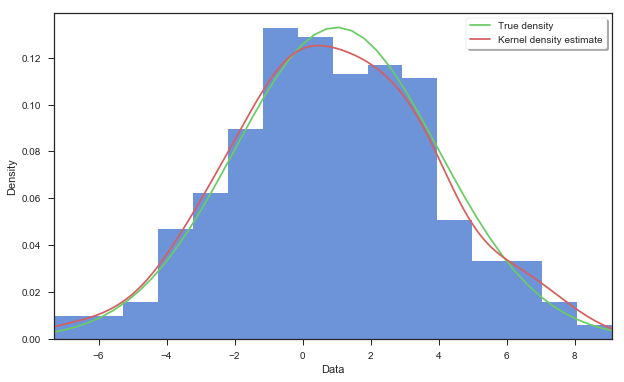

In [3]:
dist = st.norm(loc=1, scale=3)
data = dist.rvs(size=500, random_state=rs)

kde = KernelDensityEstimator().fit(data)

plt.figure(figsize=(10, 6))
plt.hist(data, bins="auto", alpha=0.8, density=True)
func_plot(dist.pdf, label="True density")
kde.plot()
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

## Example: simulated exponential data, Gaussian kernel, different bandwidths

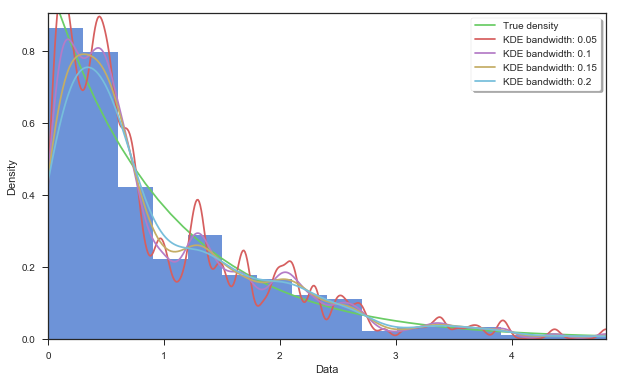

In [4]:
dist = st.expon()
data = dist.rvs(size=300, random_state=rs)

plt.figure(figsize=(10, 6))
plt.hist(data, bins="auto", alpha=0.8, density=True)
func_plot(lambda x: np.exp(-x), label="True density")

for bandwidth in [0.05, 0.1, 0.15, 0.2]:
    kde = KernelDensityEstimator().fit(data, bandwidth=bandwidth)
    kde.plot(num=500, label=f"KDE bandwidth: {bandwidth}")

plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()